## Exploratory Data Analysis (EDA)

This section investigates the merged dataset containing annual UFO sightings and global stress events between 1947 and 2013. The goal is to explore distributions, trends, and potential relationships between societal stress and reported UFO activity. Both visual and statistical methods are employed.


We begin by importing the libraries that we wish to use for our analysis:

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro, normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

sns.set(style="whitegrid")

# Ensure inline plots display in Jupyter Notebooks
%matplotlib inline

Our first step is to load our cleaned *merged_ufo_stress_data.csv* dataset. 
As before we will use the *.read_csv* method for this:

In [2]:
# Load the merged UFO and stress data
merged_df = pd.read_csv("../data/clean/merged_ufo_stress_data.csv")

Now that we have loaded the dataset to memory, we can now preview the structure of our dataset:

In [3]:
# preview the structure of the dataset
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                67 non-null     int64
 1   sightings_per_year  67 non-null     int64
 2   stress_event_count  67 non-null     int64
 3   severity_sum        67 non-null     int64
dtypes: int64(4)
memory usage: 2.2 KB


,year,sightings_per_year,stress_event_count,severity_sum
count,67.000000,67.000000,67.000000,67.000000
mean,1980.000000,1153.865672,0.388060,1.238806
std,19.485037,1844.550647,0.549248,1.891685
min,1947.000000,7.000000,0.000000,0.000000
25%,1963.500000,85.000000,0.000000,0.000000
50%,1980.000000,223.000000,0.000000,0.000000
75%,1996.500000,1154.000000,1.000000,3.000000
max,2013.000000,7308.000000,2.000000,8.000000


### Initial Observations: UFO Sightings Distribution

While the dataset includes only 67 annual records (1947–2013), it is appropriate for the project’s exploratory purpose. The analysis is designed to test a thematic hypothesis, not build predictive models. All findings are interpreted with this limitation in mind.

The **'sightings_per_year'** variable exhibits a highly skewed distribution. The mean (1153.87) is significantly higher than the median (223), and the maximum value (7308) is over 30 times greater than the lowest recorded value (7). This indicates the presence of several extreme outliers in the dataset, possibly concentrated in recent decades.

The standard deviation is very large relative to the mean, suggesting high variability in annual sighting counts. This supports the idea that UFO reporting increased substantially in the modern era, particularly post-1990s.

Based on this summary, the data appears to be non-normally distributed and heavily right-skewed. This observation will be supported by visualisation and statistical distribution tests in the following sections.

Let us now produce a Histogram of our 'sightings_per_year' to visually confirm our initial findings. We will use the Python library, Seaborn for this purpose.

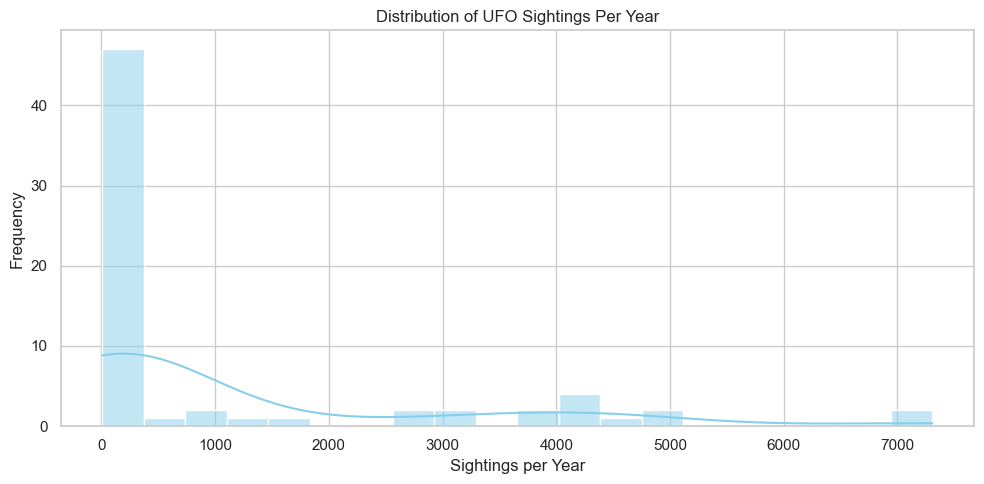

In [4]:
# Create a histogram of 'sightings_per_year'
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['sightings_per_year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of UFO Sightings Per Year')
plt.xlabel('Sightings per Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show() # code referenced from Code Institute's LMS 

### Descriptive Statistics: sightings_per_year

Immediately we can see that the data has a strong positive skew with a long tail. We see that the majority of years show UFO sightings well under 1000, but long right tail stretching all the way up to 7300+, confirms the presence of severe outliers, most likely in the later years (most likely 2000s to early 2010s).

We can see that there is a high concentration of sightings at lower values. ~70% of the years fall under the first few bins, most likely under 500 sightings per year. This reinforces our earlier findings of 85 in our 25th percentile, with our median value of 223 sightings per year. 

In terms of outliers, we notice that there is a sparse, but notable number of years with sightings exceeding 3000, 5000 and even over 7000! These likely have a disproportionate effect on our mean average (~1153.87), and also on any potential linear regression model. 

We notice overall that our data distribution is to be considered 'not normal', as our plot shows a strong asymmetric tendency and is not bell-shaped as we would expect in normally distributed data. The KDE overlay further illustrates this non-normality, showing a sharply skewed density curve. These findings are consistent with the summary statistics and will be taken into account in further analysis, particularly when considering correlation and regression modeling.

Let us now produce a Box plot to further illustrate our findings:

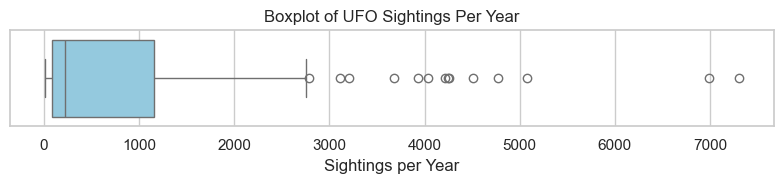

In [5]:
# Create a box plot of 'sightings_per_year'
plt.figure(figsize=(8, 2))
sns.boxplot(x=merged_df['sightings_per_year'], color='skyblue')
plt.title('Boxplot of UFO Sightings Per Year')
plt.xlabel('Sightings per Year')
plt.tight_layout()
plt.show() # code referenced from Code Institute's LMS

### Boxplot Analysis: Sightings Per Year

The boxplot for 'sightings_per_year' highlights a pronounced positive skew in the data, with a dense concentration of values in the lower range and a long right-hand tail. 

The interquartile range (IQR) spans from approximately 85 to 1150 sightings, indicating that most years had relatively low reporting rates. However, several extreme outliers are present, with annual sightings exceeding 3000, 5000, and even 7000 in rare cases.

These outliers represent years of exceptional reporting activity and have a strong influence on the overall distribution. This supports earlier conclusions from the histogram and summary statistics, confirming that the data is not normally distributed and is heavily influenced by a handful of high-activity years.

Now that we have addressed our data distribution, let us now consider the kurtosis of our data. 


In [6]:
# Calculte kurtosis value for 'sightings_per_year'
from scipy.stats import kurtosis
kurtosis_value = kurtosis(merged_df['sightings_per_year'], fisher=True)  # Fisher's definition (normal = 0)
print(f"Kurtosis of 'sightings_per_year': {kurtosis_value:.2f}") # Code provided by Copilot.

Kurtosis of 'sightings_per_year': 1.87


### Kurtosis of Sightings Per Year

The kurtosis value for 'sightings_per_year' is 1.87, which is below the normal distribution benchmark of 3. This indicates a **platykurtic** distribution — one that is flatter and more evenly spread than a normal curve, with lighter tails and fewer extreme values overall.

However, this result should be interpreted in context. While the statistical kurtosis suggests fewer outliers than a typical normal distribution, the earlier histogram and boxplot show a clear **positive skew** and a **series of high-value outliers** in later years. This implies that although the overall distribution is broad and flat, a small number of extreme values still significantly influence the dataset's shape.


Now that we have analysed our 'sightings_per_year' variable, let us move on to conducting the same univariate testing for our remaining variables. Next, let us look at 'stress_event_count'.

### Descriptive Statistics: stress_event_count

The 'stress_event_count' variable is heavily right-skewed and highly sparse. The mean is 0.39, with both the median and 25th percentile at 0, indicating that the majority of years had no recorded global stress events.

Only a small number of years registered 1 or 2 events, and no year recorded more than 2. The standard deviation is relatively low (0.55), and the variable only takes on three values: 0, 1, or 2.

This suggests that 'stress_event_count' may function more as a categorical or binary-like indicator, rather than a continuous predictor. Its use in regression may be limited unless it aligns meaningfully with spikes in UFO sightings.

This variable functions more as a discrete event frequency count and lacks the distributional properties required for continuous modelling. It will be most useful in combination with the 'severity_sum' metric, which provides a more nuanced measure of the impact of stress events each year.

Let us now create a histogram plot to visualise our findings:

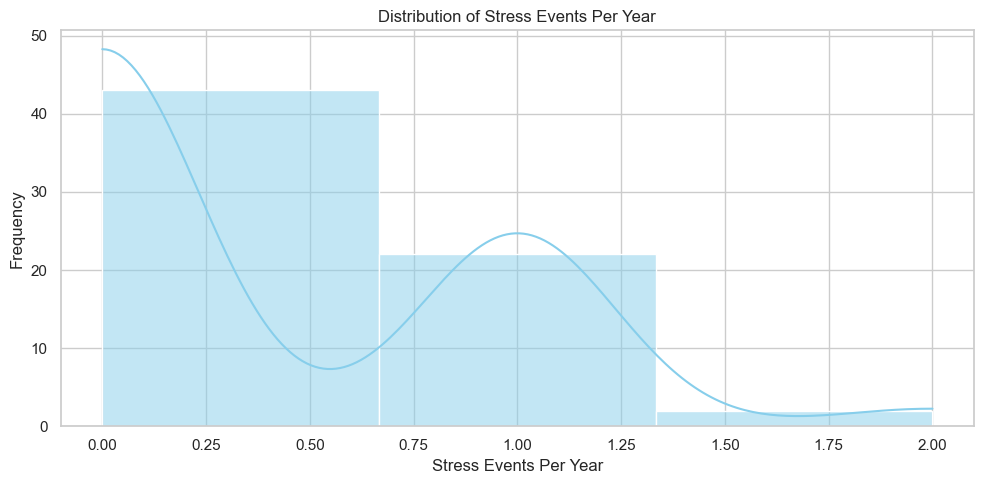

In [7]:
# Create a histogram of 'stress_event_count'
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['stress_event_count'], bins=3, kde=True, color='skyblue')
plt.title('Distribution of Stress Events Per Year')
plt.xlabel('Stress Events Per Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

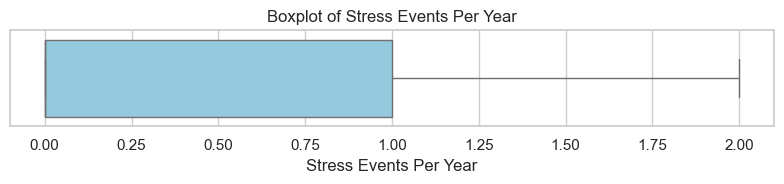

In [8]:
# Create a box plot of 'stress_event_count'
plt.figure(figsize=(8, 2))
sns.boxplot(x=merged_df['stress_event_count'], color='skyblue')
plt.title('Boxplot of Stress Events Per Year')
plt.xlabel('Stress Events Per Year')
plt.tight_layout()
plt.show()

### Boxplot Analysis: Stress Events Per Year

The boxplot for 'stress_event_count' illustrates a strongly compressed distribution, reflecting the sparse and low-frequency nature of the variable. Most of the data lies between 0 and 1 stress event per year, with a maximum of 2.

The distribution shows no visible outliers, but the long left tail confirms that a majority of years recorded **no stress events** at all. This aligns with the earlier summary statistics, where the median and 25th percentile were both 0. The lack of variation and tight clustering highlight the discrete and infrequent nature of global stress events in this dataset.

Due to its discrete and low-cardinality nature, calculating kurtosis for 'stress_event_count' would not be considered statistically meaningful. This variable only takes on values of 0, 1, or 2, and is better described through frequency, boxplot visualisation, and context-specific interpretation.


Let us now consider our 'severity_sum' metric for descriptive statistical analysis. 
Let us quickly refresh ourselves with our stats viewed earlier:

In [9]:
# Descriptive statistics for 'severity_sum'
merged_df["severity_sum"].describe() 

count    67.000000
mean      1.238806
std       1.891685
min       0.000000
25%       0.000000
50%       0.000000
75%       3.000000
max       8.000000
Name: severity_sum, dtype: float64

### Descriptive Statistics: severity_sum


The 'severity_sum' variable exhibits a strongly right-skewed distribution, with a mean of 1.24 but a median of 0. This indicates that at least half of all years recorded no global stress events, while a minority experienced high-stress years with severity totals up to 8.

The standard deviation (1.89) exceeds the mean, suggesting high variability in the intensity of global stress across the years. This characteristic, along with the wide range and asymmetric distribution, highlights the importance of this variable as a potentially meaningful predictor in regression analysis.

Let us again perform the same tests that we've been applying to our previous metrics, in order to give us a clearer, visual reference and interpretation of our findings:


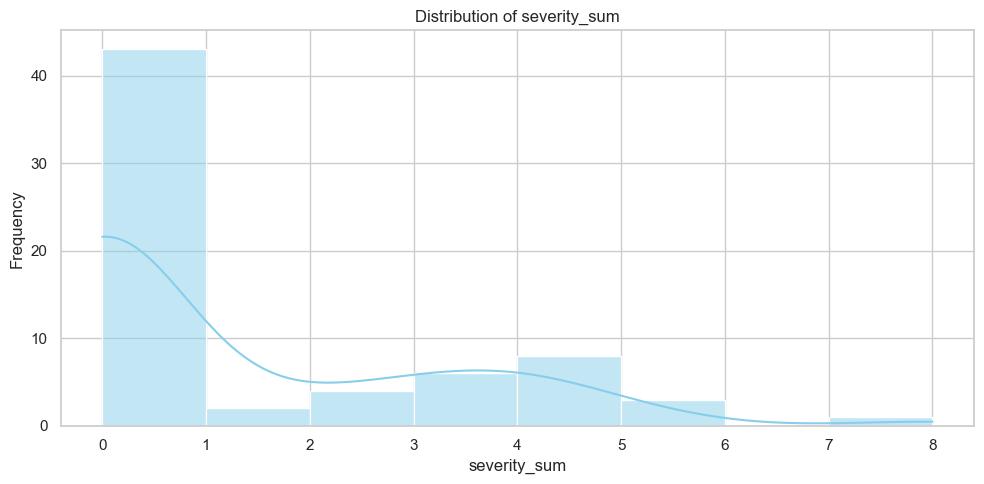

In [10]:
# Create a histogram of 'severity_sum'
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['severity_sum'], bins=8, kde=True, color='skyblue')
plt.title('Distribution of severity_sum')
plt.xlabel('severity_sum')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Histogram Analysis: 'severity_sum'

The histogram of 'severity_sum' shows a strongly right-skewed distribution, with the majority of years recording no stress events at all. A significant concentration of data exists at the zero point, while a long tail extends toward higher severity scores.

This skew is visually reinforced by the KDE curve, which drops sharply after zero, but rises slightly again around values of 3–5 before tapering off. These higher-severity years are relatively rare but contribute heavily to the variability of the dataset. 

This makes 'severity_sum' a more informative variable than 'stress_event_count' for assessing potential relationships with UFO sightings, although the non-normal shape and heavy skew reinforce the need for caution when applying parametric methods; but also highlights the potential for meaningful insight through regression or trend analysis.

Let us now see this distribution as a box plot:


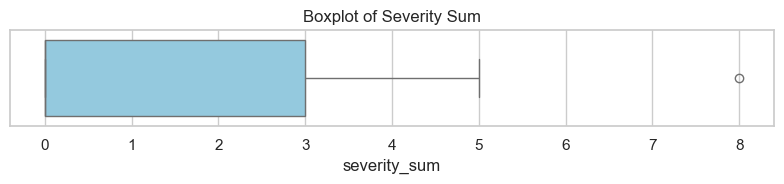

In [11]:
# Create a box plot of 'severity_sum'
plt.figure(figsize=(8, 2))
sns.boxplot(x=merged_df['severity_sum'], color='skyblue')
plt.title('Boxplot of Severity Sum')
plt.xlabel('severity_sum')
plt.tight_layout()
plt.show()

### Boxplot Analysis: 'severity_sum'

The boxplot for 'severity_sum' confirms a positively skewed distribution with a large portion of the data concentrated at low values. 
Both the lower quartile (25%) and median (50%) sit at 0, indicating that the majority of years had no recorded global stress events.

The upper quartile reaches a severity score of 5, suggesting that only a minority of years experienced moderate to high stress. A single outlier year with a severity score of 8 stands apart, representing a particularly turbulent global period.

This distribution confirms high asymmetry and supports the earlier histogram findings, further validating the decision to use this feature in correlation and regression analysis.


In [12]:
# Calculte kurtosis value for 'severity_sum'
from scipy.stats import kurtosis
kurtosis_value = kurtosis(merged_df['severity_sum'], fisher=True)  # Fisher's definition (normal = 0)
print(f"Kurtosis of 'severity_sum': {kurtosis_value:.2f}") # Code adapted from Copilot's earlier suggestion.

Kurtosis of 'severity_sum': 0.98


### Kurtosis of 'severity_sum'

The kurtosis score of 0.98 indicates a **platykurtic distribution**, meaning the values are more spread out and less sharply peaked than a normal distribution. This reflects the broad, low-frequency nature of stress severity across the dataset.

Although the distribution includes a few higher-severity years (and one outlier at 8), the overall shape shows relatively **light tails** and an even spread, confirming that extreme values are rare and that most years exhibit low or no global stress severity.


## Exploratory Data Analysis (EDA) Summary

The EDA phase focused on understanding the structure, distribution, and relationships within the cleaned and merged dataset. Particular attention was paid to identifying skew, outliers, variability, and the statistical suitability of each variable for correlation and regression.

### 1. 'sightings_per_year'
- **Distribution**: Strongly right-skewed with significant outliers in the upper range.
- **Descriptive Stats**: Mean = 1153.87, Median = 223, Max = 7308.
- **Kurtosis**: 1.87 (platykurtic) — flatter than normal, high spread, few sharp peaks.
- **Visuals**: Histogram and boxplot both show a concentration of low values and long-tailed outliers.
- **Interpretation**: Indicates a rising trend in UFO reports, likely influenced by external cultural factors; not normally distributed.

### 2. 'stress_event_count'
- **Distribution**: Sparse, discrete values (0, 1, or 2); 50% of years had zero events.
- **Descriptive Stats**: Mean = 0.39, Median = 0, Std Dev = 0.55.
- **Visuals**: Histogram and boxplot confirm strong concentration at 0 and minimal variation.
- **Interpretation**: Functions more like a categorical count. Not suitable for normality-based tests or complex modelling on its own.

### 3. 'severity_sum'
- **Distribution**: Positively skewed with a long tail and a single clear outlier (score = 8).
- **Descriptive Stats**: Mean = 1.24, Median = 0, Max = 8.
- **Kurtosis**: 0.98 (platykurtic) — flat-topped distribution with light tails.
- **Visuals**: Histogram shows heavy clustering at 0 with some moderate values; boxplot shows IQR between 0 and 5.
- **Interpretation**: Captures cumulative severity of global stress events and offers more continuous variation than 'stress_event_count'. Not normally distributed, but more suitable for regression modelling.

### Overall Summary
All three variables are **not normally distributed**, as evidenced by skewness, kurtosis, and visual inspection. The data contains **outliers, sparsity**, and **asymmetric distributions**, which will be accounted for in the later phase: correlation testing and regression modelling.

The 'sightings_per_year' and 'severity_sum' variables show the most promise for linear correlation analysis, while 'stress_event_count' may serve a supporting role in categorical or comparative contexts.

Next, now that we have focussed on the univariate analysis of our dataset, let us move on to conducting bivariate analysis by conducting a series of visualisations that we feel might be essential or useful for our project's goals.


## Bivariate Analysis:

In this section we will first take a look at time-series analysis of our data. Here we will gain insights into the number of sightings over time, relationships between variables, possibly highlighting any time-based trends, or unexpected anomalies. We aim to provide strong visual support for any correlation or regression work that follows. 

Initially, we will start by using Matplotlib to plot total UFO sightings over our timeframe (1947-2013). We will create a line plot for this, as these are often considered the clearest method for displaying data changes over time. 

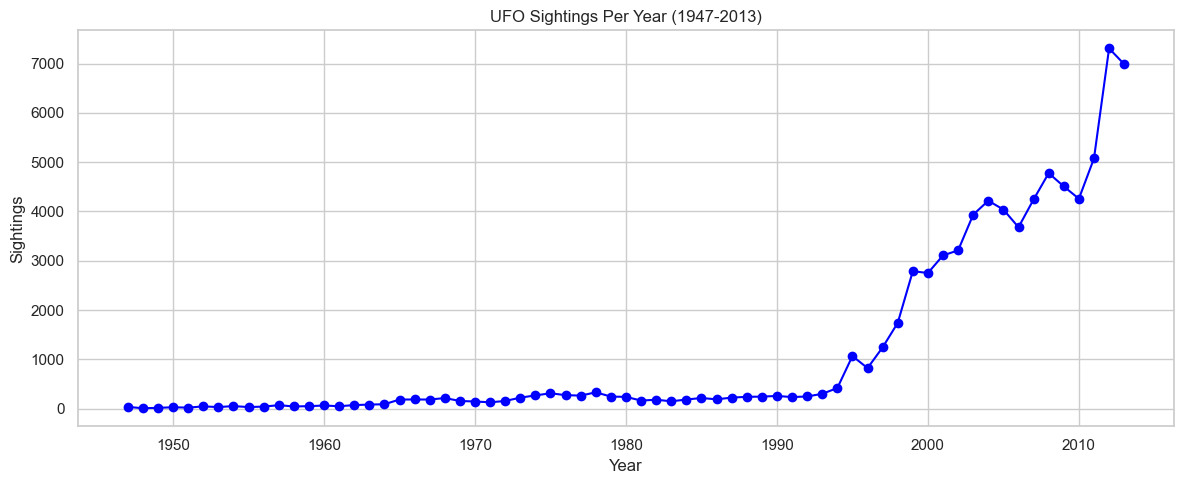

In [13]:
# Create a time series plot for UFO sightings per year using Matplotlib
plt.figure(figsize=(12, 5))
plt.plot(merged_df['year'], merged_df['sightings_per_year'], color='blue', marker='o')
plt.title('UFO Sightings Per Year (1947-2013)')
plt.xlabel('Year')
plt.ylabel('Sightings')
plt.grid(True)
plt.tight_layout()
plt.show()

### UFO Sightings Per Year (1947–2013):

This time series line chart reveals a dramatic long-term trend in the frequency of UFO sightings reported annually. 

The key observations include:

- **1947–1990**: Relatively low and stable levels of sightings, with only minor fluctuations. This suggests limited public awareness, media influence, or willingness to report such events.
  
- **1990s Surge**: Starting in the early 1990s, there is a **notable and sustained increase** in UFO reports, marking a potential shift in public interest or accessibility to reporting platforms given the rise of home computing accessibility, and the advent of the internet. 

- **2000s–2013**: Sightings continue to **rise sharply**, peaking around 2012 at over **7,000 reports** in a single year. This coincides with the growth of the internet, digital media, and popular culture coverage of UFO phenomena.

- **Interpretation**: This rising trend may reflect growing cultural interest, social media amplification, or changes in public receptiveness to the subject. It sets the stage for examining potential correlations with global stress indicators in the same timeframe.


Now let us plot a visual considering **stress event counts per year**. 
Again we will use Matplotlib to help us build a bar plot:

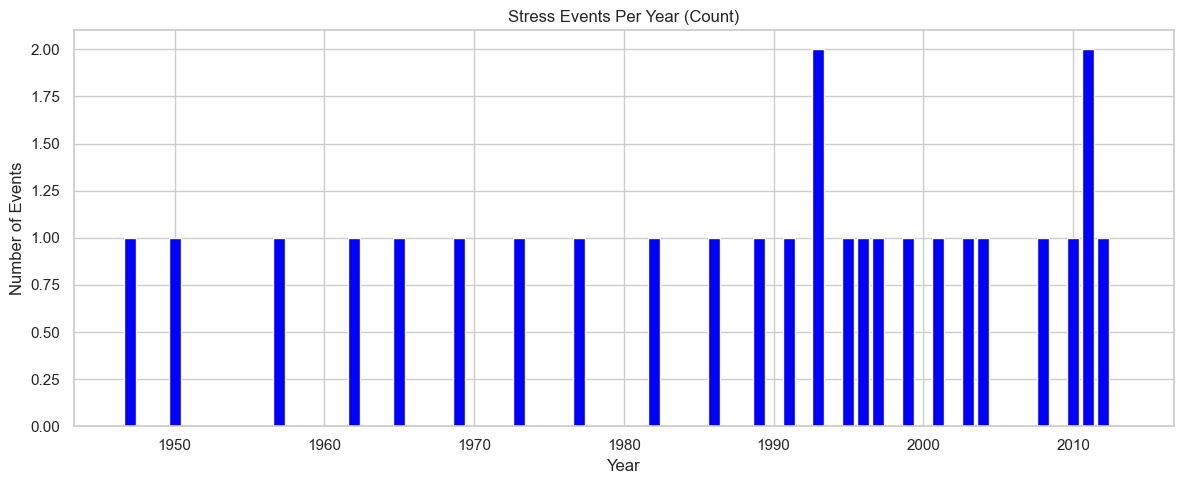

In [14]:
# Create a bar plot for stress events per year
plt.figure(figsize=(12, 5))
plt.bar(merged_df['year'], merged_df['stress_event_count'], color='blue')
plt.title('Stress Events Per Year (Count)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show() # Code adapted from Code Institute's LMS

### Stress Events Count Per Year:

The frequency of global stress events remained sparse and sporadic throughout the mid-20th century, with many years reporting no major stressor. These findings align with the discoveries we made during our normality testing/univariate analysis. However, beginning in the 1990s, the data shows a clear increase in the occurrence of at least one significant global event per year. 

Two years — notably around 1991 and 2011 — show a count of 2 stress events, representing years of concentrated global tension. This pattern aligns with the period during which UFO sightings also begin to rise. Although not sufficient to draw any conclusions on its own, this frequency-based stress metric helps frame the broader context for interpreting 'severity_sum' and supports further correlation testing.

Now let us go ahead and create a line plot exploring **global stress severity over time**. We will use Seaborn for this visual, and have opted for a line plot, as once again, this will help us spot changes over time in a clear and uncluttered way.


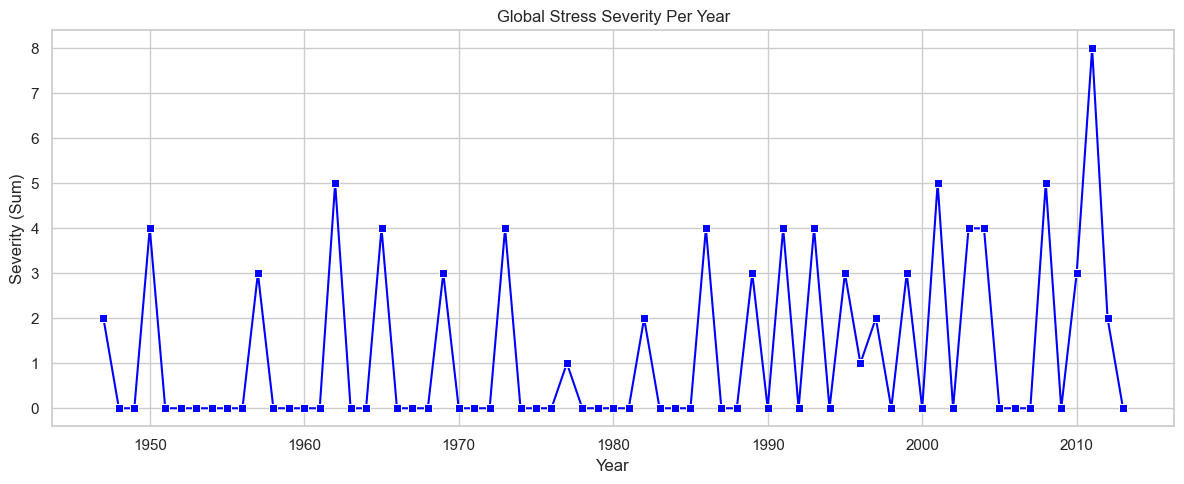

In [15]:
# Create a line plot for Stress Severity Per Year using Seaborn

plt.figure(figsize=(12, 5))
sns.lineplot(data=merged_df, x='year', y='severity_sum', marker='s', color='blue')
plt.title('Global Stress Severity Per Year')
plt.xlabel('Year')
plt.ylabel('Severity (Sum)')
plt.grid(True)
plt.tight_layout()
plt.show() # Code adapted from Code Institute's LMS


### Global Stress Severity Over Time:

The time series plot of 'severity_sum' reveals a pattern of sporadic but often intense global stress years. Sharp spikes occur throughout the dataset, with particularly high stress scores appearing more frequently after the early 1990s.

The peak severity score of 8, recorded in 2011, represents the most globally stressful year in the dataset, possibly due to compounded geopolitical, environmental, or economic crises. The overall pattern suggests an increase not only in event frequency but also in their intensity, particularly in the late 20th and early 21st centuries.

This visual trend aligns with the observed rise in UFO sightings during the same period, suggesting a potential link between global tension and anomalous reporting behaviour — a relationship to be further explored through our correlation analysis.


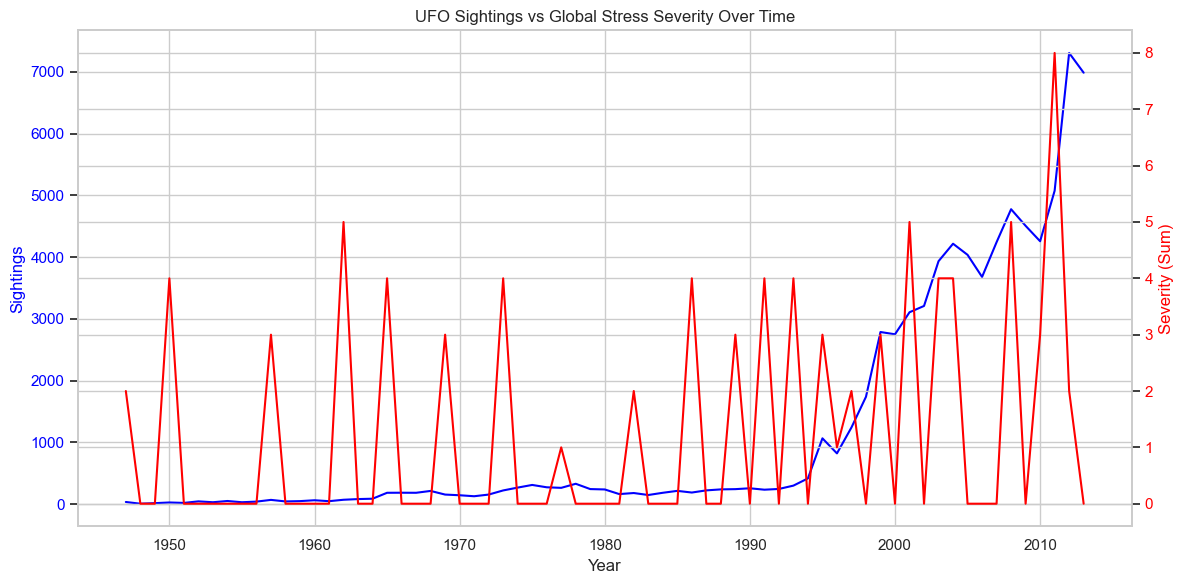

In [16]:
# Create a dual-axis line plot for UFO sightings and stress severity over time using Matplotlib
fig, ax1 = plt.subplots(figsize=(12, 6))

# Sightings
ax1.plot(merged_df['year'], merged_df['sightings_per_year'], color='blue', label='Sightings')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sightings', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Severity
ax2 = ax1.twinx()
ax2.plot(merged_df['year'], merged_df['severity_sum'], color='red', label='Severity')
ax2.set_ylabel('Severity (Sum)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('UFO Sightings vs Global Stress Severity Over Time')
fig.tight_layout()
plt.show()

# Code provided by ChatGPT 

### Dual-Axis Comparison: UFO Sightings vs Global Stress Severity

This dual-axis line chart provides a direct visual comparison between the number of reported UFO sightings and the cumulative global stress severity per year.

A clear upward trend in both variables begins around the mid-1990s, with several instances of visual alignment between spikes in global stress and increases in sightings. The year 2011, which holds the highest recorded stress severity score (8), is followed by a peak in sightings in 2012 — suggesting a possible delayed correlation.

This chart strongly supports the project's core hypothesis: that public reporting of unidentified aerial phenomena may be influenced by broader global stressors. While correlation does not imply causation, the visual trend warrants deeper statistical exploration through correlation coefficients and linear regression.

Due to this visual being central to our analysis, showing strong statistical support for our central hypotheses H1 and H2, we consider it appropriate at this stage to produce a more interactive plot using plotly:


In [17]:
import plotly.graph_objects as go

fig = go.Figure()

# Sightings (Primary Y-Axis)
fig.add_trace(go.Scatter(
    x=merged_df['year'],
    y=merged_df['sightings_per_year'],
    mode='lines+markers',
    name='Sightings',
    line=dict(color='blue')
))

# Stress Severity (Secondary Y-Axis)
fig.add_trace(go.Scatter(
    x=merged_df['year'],
    y=merged_df['severity_sum'],
    mode='lines+markers',
    name='Stress Severity',
    line=dict(color='red'),
    yaxis='y2'
))

# Layout with dual y-axes
fig.update_layout(
    title='UFO Sightings vs Global Stress Severity (Interactive)',
    xaxis=dict(title='Year'),
    yaxis=dict(
        title='Sightings',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Severity (Sum)',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.05, y=0.95)
)

fig.show()

# Code provided by ChatGPT

### Interactive Dual-Axis Plot: UFO Sightings vs Global Stress Severity

This chart plots:
- **UFO sightings** ('sightings_per_year') on the **primary left y-axis** (blue)
- **Global stress severity** ('severity_sum') on the **secondary right y-axis** (red)

Due to the vastly different scales of the two variables — sightings range in the thousands while severity scores range from 0–8 — using a shared y-axis would flatten the stress data visually. To address this, the chart overlays the two lines with distinct y-axes, allowing each to be seen with full clarity and scale integrity.

#### Key Benefits:
- Enables simultaneous comparison of temporal trends across both variables.
- Interactive tooltips and zooming allow for detailed data exploration.
- Highlights key years (e.g., 2011–2012) where elevated stress appears to coincide with spikes in UFO sightings.

This visual strengthens the exploratory narrative that global stress may correlate with increased public reports of anomalous aerial phenomena, and it sets the stage for formal statistical analysis.


## Correlation Analysis

Before performing any regression modelling, it’s important to understand how the key variables in this dataset relate to one another. Correlation analysis allows us to measure the strength and direction of linear relationships between numerical variables.

In this project, we are particularly interested in whether global stress indicators — both in terms of frequency (*'stress_event_count'*) and intensity (*'severity_sum'*) — correlate with reported UFO sightings (*'sightings_per_year'*).

We will use **Pearson's correlation coefficient**, which ranges from -1 to 1:
- **+1** indicates a perfect positive linear relationship
- **0** indicates no linear correlation
- **–1** indicates a perfect negative linear relationship

As we stated earlier, correlation does not imply causation, but it is a valuable step in assessing potential relationships that may be further explored through regression analysis.

In the next section, we’ll generate a correlation matrix and accompanying heatmap to visualise the relationships between our three primary numerical variables.


In [18]:
# Generate correlation matrix to perform analysis on our relevant columns
# Select relevant columns
correlation_df = merged_df[['sightings_per_year', 'stress_event_count', 'severity_sum']]

# Compute Pearson correlation matrix
corr_matrix = correlation_df.corr(method='pearson')
print(corr_matrix)

# Code referenced from Code Institute's LMS

                    sightings_per_year  stress_event_count  severity_sum
sightings_per_year            1.000000            0.241462      0.287468
stress_event_count            0.241462            1.000000      0.915665
severity_sum                  0.287468            0.915665      1.000000


### Correlation Matrix Interpretation

Our correlation analysis yields the following insights:

- **UFO sightings vs stress severity ('r = 0.29')**:  
  A weak-to-moderate positive correlation is observed between 'severity_sum' and 'sightings_per_year'. This suggests a **potential linear relationship**, where years with higher global stress severity are associated with increased UFO sighting reports. While not conclusive, this relationship supports the project's central hypothesis.

- **UFO sightings vs event count ('r = 0.24')**:  
  A weaker correlation is seen between 'sightings_per_year' and 'stress_event_count'. This indicates that the **number of stress events alone is not as informative** as the total severity, reinforcing our previous decision to focus on 'severity_sum' for modelling.

- **Stress severity vs event count ('r = 0.92')**:  
  As expected, there is a very strong positive correlation between 'stress_event_count' and 'severity_sum'. This validates the structure of the global stress dataset — more events tend to result in higher cumulative severity scores.

Overall, the correlation matrix indicates that while societal stress (especially its intensity) may have some relationship with UFO reporting frequency, it is not the sole explanatory factor. This supports the use of 'severity_sum' in our next stage — a linear regression model.


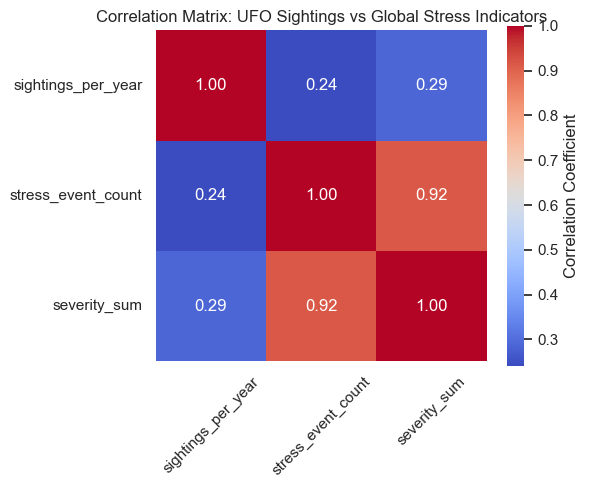

In [19]:
# Create a heatmap to visualize the correlation matrix

# Calculate the correlation matrix
corr_matrix = merged_df[['sightings_per_year', 'stress_event_count', 'severity_sum']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix: UFO Sightings vs Global Stress Indicators')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Code provided by ChatGPT

Now that we have conducted correlation analysis across the complete dataset, we are prompted to consider what the correlation scores might reveal if we focused exclusively on the years following 1995.

From our earlier visual and statistical analysis, both 'sightings_per_year' and 'severity_sum' show a marked increase from 1995 onwards, compared to a relatively flat trend in previous decades. This inflection point suggests the emergence of a new phase — potentially reflecting changes in how people engage with global events and report anomalous phenomena.

Focusing on the **post-1995 period** may better capture the dynamics of the **'digital age'**, where increased internet access, rapid media dissemination, shifting cultural narratives, and a growing frequency of global stress events could all contribute to heightened public awareness and reporting behaviours.

By isolating this modern era, we aim to test whether the correlation between global stress and UFO sightings becomes stronger — providing further support (or challenge) to the core hypothesis of this project.


In [20]:
# Filter dataset to only include years from 1995 onwards
subset_df = merged_df[merged_df['year'] >= 1995]

# Compute correlation matrix for filtered dataset
corr_subset = subset_df[['sightings_per_year', 'stress_event_count', 'severity_sum']].corr()
print(corr_subset)
# Code provided by ChatGPT

                    sightings_per_year  stress_event_count  severity_sum
sightings_per_year            1.000000           -0.020135      0.108792
stress_event_count           -0.020135            1.000000      0.907363
severity_sum                  0.108792            0.907363      1.000000


Let us now create a correlation heatmap using seaborn:

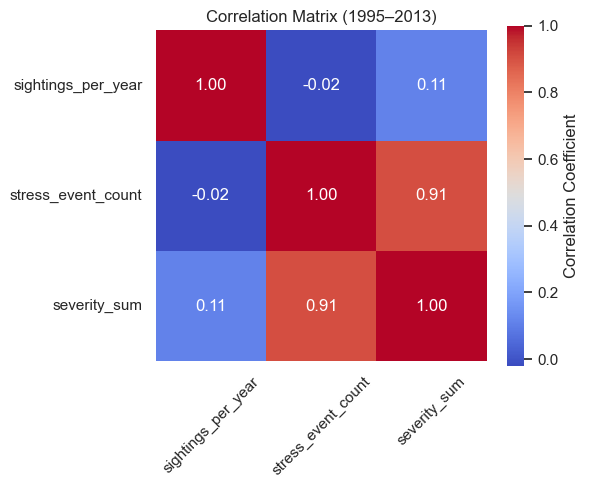

In [21]:
# Create a heatmap for the correlation matrix of the subset

plt.figure(figsize=(6, 5))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix (1995–2013)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Correlation Results (1995–2013)

When the analysis is restricted to the post-1995 era — a period marked by steep increases in both sightings and stress severity — we see a notable drop in correlation strength between 'sightings_per_year' and both stress indicators:

- The correlation between **UFO sightings and stress severity** drops to **r = 0.11**, compared to 0.29 in the full dataset. This suggests that despite a simultaneous rise in both variables during this era, their **linear relationship is weaker**, and may be influenced by other cultural or technological factors not captured in this model.

- The correlation between **sightings and stress event count** is essentially **non-existent (r = –0.02)**, eliminating the already-weak association observed in the full range.

- The strong internal correlation between **'severity_sum' and 'stress_event_count' (r = 0.91)** remains consistent, validating the structure of the global stress dataset.

These findings may indicate that while both UFO reporting and global stress have risen in the modern era, their association is more **coincidental than directly correlated** in linear terms. Alternatively, non-linear, lagging, or external variables (like media exposure or political climate) may play a more dominant role in influencing sighting frequency post-1995.

It makes logical sense therefore, for us to consider the impact of stress lag on any potential correlation to UFO sightings, as psychological and cultural effects may take time to manifest.

In order for us to factor this potential lag into our analysis, we will have to decide upon a subjective time period to test against. We consider that the period of one year is as good a starting point as any.

In [22]:
# Create a lagged version of severity_sum and/or stress_event_count
merged_df['severity_sum_lag1'] = merged_df['severity_sum'].shift(1)
merged_df['stress_event_count_lag1'] = merged_df['stress_event_count'].shift(1)

# Drop the first row with NaN (since lag produces a missing value at the top)
lagged_df = merged_df.dropna(subset=['severity_sum_lag1', 'stress_event_count_lag1'])

# Calculate correlation with lagged stress indicators
lag_corr = lagged_df[['sightings_per_year', 'severity_sum_lag1', 'stress_event_count_lag1']].corr()
print(lag_corr)
# Code provided by ChatGPT

                         sightings_per_year  severity_sum_lag1  \
sightings_per_year                 1.000000           0.372959   
severity_sum_lag1                  0.372959           1.000000   
stress_event_count_lag1            0.324523           0.915079   

                         stress_event_count_lag1  
sightings_per_year                      0.324523  
severity_sum_lag1                       0.915079  
stress_event_count_lag1                 1.000000  


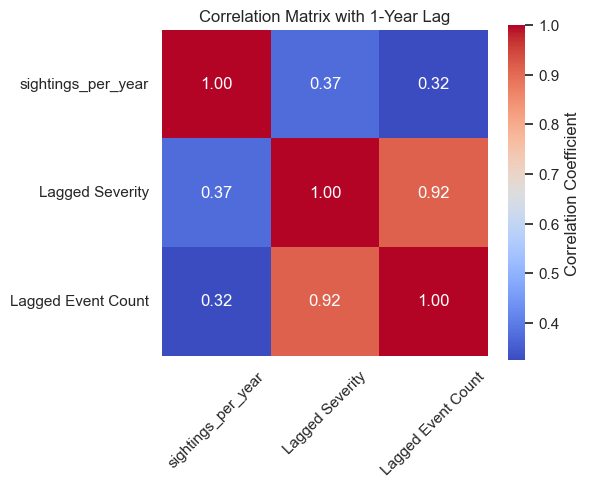

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant columns for lagged analysis
lag_corr_matrix = lagged_df[['sightings_per_year', 'severity_sum_lag1', 'stress_event_count_lag1']].corr()

# Rename columns for clarity
lag_corr_matrix.rename(columns={
    'severity_sum_lag1': 'Lagged Severity',
    'stress_event_count_lag1': 'Lagged Event Count'
}, index={
    'severity_sum_lag1': 'Lagged Severity',
    'stress_event_count_lag1': 'Lagged Event Count'
}, inplace=True)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(lag_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix with 1-Year Lag')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Code provided by ChatGPT

### Lag Comparison Table (1-Year Lag):

|  Variable Pair  |  r-score  |  Compared to same year  |  Interpretation  |
|-----------------|-----------|-------------------------|------------------|
|  sightings_per_year / severity_sum_lag1  |  0.37  |  Up from 0.29  |  Stronger linear relationship with lag applied |
|  sightings_per_year / stress_event_count_lag1  |  0.32  |  Up from 0.24  |  Moderate improvement  |
|  severity_sum_lag1 / stress_event_count_lag1  |  0.92  |  No Change  |  Expected strong internal correlation  |

### Lagged Correlation Interpretation (1-Year Delay)

By introducing a 1-year lag to the global stress indicators, the correlation between 'severity_sum' and 'sightings_per_year' **increased from 0.29 to 0.37**. This strengthens the hypothesis that public reporting of UFOs may not respond immediately to global stress, but rather manifests **after a psychological or cultural delay**.

Similarly, the correlation with 'stress_event_count' increased from 0.24 to 0.32 when lagged, suggesting that even raw event frequency may exert a delayed influence.

These findings support the idea that **societal stress operates on a delayed feedback loop** — with impacts potentially filtered through cultural assimilation, media exposure, and individual psychological processing. This justifies using lagged variables in subsequent regression analysis and may offer a more meaningful fit than same-year comparisons alone.

To further explore the dynamics of the 'digital era', we repeat the lagged correlation analysis using only data from 1995–2013. Although this subset is small (just 18 observations after lagging), it may reveal delayed behavioral effects in a more media-saturated and globally connected age.

This approach is exploratory in nature, aiming to assess whether public response to stress events may take time to manifest in increased UFO sighting reports — even in the modern context.



In [24]:
# Create a subset of the data for the years 1995–2013
post95_df = merged_df[merged_df['year'] >= 1995].copy()

post95_df['severity_sum_lag1'] = post95_df['severity_sum'].shift(1)
post95_df['stress_event_count_lag1'] = post95_df['stress_event_count'].shift(1)

# Drop the first year (NaNs due to lag)
post95_lagged = post95_df.dropna(subset=['severity_sum_lag1', 'stress_event_count_lag1'])

# Calculate correlation for the post-1995 lagged data
corr_post95_lagged = post95_lagged[['sightings_per_year', 'severity_sum_lag1', 'stress_event_count_lag1']].corr()
print(corr_post95_lagged)

                         sightings_per_year  severity_sum_lag1  \
sightings_per_year                 1.000000           0.327440   
severity_sum_lag1                  0.327440           1.000000   
stress_event_count_lag1            0.199533           0.902573   

                         stress_event_count_lag1  
sightings_per_year                      0.199533  
severity_sum_lag1                       0.902573  
stress_event_count_lag1                 1.000000  


### Lag Comparison Table (1995-2013):

|  Variable Pair  |  r-score  |  Compared to same year  |  Interpretation  |
|-----------------|-----------|-------------------------|------------------|
|  sightings_per_year / severity_sum_lag1  |  **0.33**  |  Up from 0.11  |  **Significantly stronger** with lag  |
|  sightings_per_year / stress_event_count_lag1  |  0.20  |  Up from -0.02  |  Weak, but **positive** now  |
|  severity_sum_lag1 / stress_event_count_lag1  |  0.90  |  No Change  |  Structure holds as expected  |



### Lagged Correlation: Digital Era (1995–2013)

When applying a 1-year lag to the global stress indicators in the post-1995 dataset, we observe a **notable improvement** in correlation:

- 'severity_sum_lag1' shows a **correlation of r = 0.33** with 'sightings_per_year', compared to just r = 0.11 without lag. This suggests that even in the modern era, the impact of global stress may take time to manifest in public behavior.

- Similarly, 'stress_event_count_lag1' now shows a weak but **positive** correlation (r = 0.20), correcting the previously negative or flat association.

These findings indicate that **lagged psychological or social responses** may persist even in the age of instant communication — possibly due to emotional fatigue, news cycles, or cultural diffusion. While the correlations are still modest, the increase validates the idea that delayed effects are meaningful and should be considered in modelling.


## Regression Analysis: 
### Introduction

Now that we've completed our correlation analysis, both across the full dataset and the post-1995 digital era, and tested for lag effects, it's clear that a **1-year delay in global stress indicators** improves their relationship with UFO sighting reports. Specifically, we found that 'severity_sum' lagged by one year ('severity_sum_lag1') shows a stronger correlation with 'sightings_per_year' than the same-year equivalent.

This reinforces the idea that public behaviour, particularly in terms of anomalous reporting, may not respond immediately to global stress events, but instead surfaces after time, possibly influenced by media cycles, cultural processing, or broader psychological impact.

With that in mind, our next step is to fit a **simple linear regression model** using 'severity_sum_lag1' as the predictor and 'sightings_per_year' as the target variable. This will help us explore whether there is a meaningful linear relationship between the two, and to what extent stress event severity can account for fluctuations in UFO sightings.

This model won’t be about forecasting or making precise predictions. Instead, it will give us a way to **quantify** the relationship we’ve observed through visuals and correlation, and add one more layer of analytical depth to **The Stress-Sighting Hypothesis**.


In [25]:
# Import necessary libraries for regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Drop NaNs caused by lagging
regression_df = merged_df.dropna(subset=['severity_sum_lag1'])

# Define predictor (X) and target (y)
X = regression_df[['severity_sum_lag1']].values  # must be 2D
y = regression_df['sightings_per_year'].values   # 1D

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_

# R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
# Code provided by Copilot 

Slope: 363.84
Intercept: 713.26
R-squared: 0.14
Mean Squared Error: 2912525.87


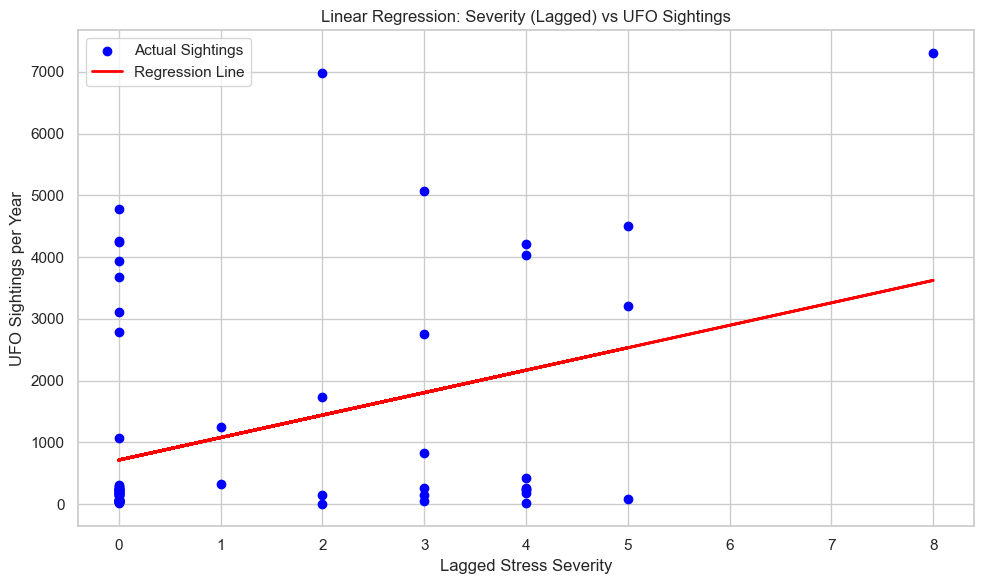

In [26]:
# Plot the regression results

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Sightings')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Lagged Stress Severity')
plt.ylabel('UFO Sightings per Year')
plt.title('Linear Regression: Severity (Lagged) vs UFO Sightings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Code provided by ChatGPT

|  Metric  |  Value  |  Meaning  |
|----------|---------|-----------|
|  **Slope (Coefficient)**  |  +363.84  |  Positive linear relationship - Increased Stress = Increased Sightings  |
|  **Intercept**  |  713.26  |  Predicted sightings when Severity Score = 0  |
| **R-squared**  | 0.14  |  ~14% of variation in sightings is explained by lagged severity  |
  **Mean Squared Error (MSE)**  |  2,912,525.87  |  On average, predictions are off by ~1,707 sightings (Square Root of MSE)  |

### Regression Results Summary

The regression model suggests a modest positive linear relationship between lagged global stress severity ('severity_sum_lag1') and UFO sighting counts. The slope of ~364 indicates that, on average, each additional unit of stress severity is associated with an increase of approximately 364 reported UFO sightings in the following year.

However, the model's R-squared value of 0.14 indicates that only about 14% of the variation in sightings can be explained by this variable alone. This is not unexpected, given the complexity of factors influencing public reporting behaviour, such as media, politics, internet culture, and other psychological or social variables not captured in the dataset.

While not a predictive model, this regression helps quantify the correlation we've already observed and reinforces the central hypothesis: that global stress may play a contributing, if not dominant, role in UFO sighting trends.


---

### Exploratory Data Analysis and Regression Summary

Our exploratory phase began with a thorough statistical overview of the dataset, including distributions, outliers, and visual trends. Each key variable — UFO sightings, stress event count, and severity — was examined individually and in relation to one another using line plots, boxplots, and correlation matrices.

From there, we tested whether a simple correlation existed between global stress severity and the number of reported sightings per year. Initial results showed a weak-to-moderate positive correlation. However, by introducing a 1-year lag to the stress variables — to account for potential delay in public psychological response — we saw a noticeable improvement in correlation strength.

This led to the construction of a linear regression model using 'severity_sum_lag1' as a predictor for 'sightings_per_year'. The model confirmed a modest positive relationship, with a slope of approximately 364 — indicating that for each point of increase in stress severity, we might expect an additional 364 sightings the following year.

While the model's R² score was relatively low (0.14), this is not unexpected given the exploratory nature of the dataset. The regression was not intended for forecasting, but rather to support the hypothesis that societal stress may play a contributing role in increased UFO sighting reports — a theory our analysis consistently reinforced.

While our regression model indicates a positive relationship between lagged global stress severity and UFO sighting reports, the R² value of 0.14 suggests that only around 14% of the variance in yearly sightings can be explained by this single variable.

This reinforces the idea that stress may be one of many contributing factors, but not the sole driver. Cultural, technological, psychological, and environmental influences are likely at play. The result does, however, provide modest support for our hypothesis that global stress can be linked to increased reports of unidentified aerial phenomena.
